In [1]:
! pip install spacy

# Word Embeddings

Word embeddings are vector representations of words in a continuous space. They map words to numerical vectors when preparing data for further 
analysis. These vector representations help us address challenges related to word meaning, context, relationships, and ambiguity that other text 
representation techniques, such as BoW and TF-IDF, might not address.

Importance of word embeddings
Word embeddings are crucial for several reasons:

Semantic meaning: They capture the semantic meaning of words, i.e., words with similar meanings are represented as vectors close together in the embedding space.

Contextual information: They capture contextual information, i.e., words often appearing in similar contexts will have similar vector representations.

Dimensionality reduction: They reduce the high-dimensional space of words to a lower-dimensional space, making computations more efficient.

Handling out-of-vocabulary words: They can represent words not seen during training by generalizing from similar words.

Steps for working with word embeddings : 

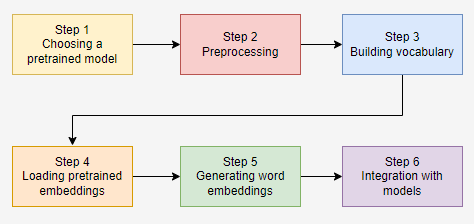


In [ ]:
# example 1

In [3]:
# a. install necessary libraries

import pandas as pd
import string
import spacy
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
nlp = spacy.load('en_core_web_sm')

In [5]:
# b. import necessary dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/sentiment.csv')
pd.set_option('display.max_colwidth', 300)
df.head()

,review_id,review_text,rating,author_name
0,1,I have to go to the store.,5,john smith
1,2,This product is amazing.,4,jane doe
2,3,This is the best movie I have ever seen.,5,alex johnson
3,4,The customer support was terrible.,2,emily thompson
4,5,The food was delicious.,4,michael brown


In [6]:
# c. define the preprocessing function

def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [token.lemma_ for token in nlp(text.lower())]
    return ' '.join(tokens)

In [7]:
# apply preprocessing function to review_text and store in processed text

df['processed_text'] = df['review_text'].apply(preprocess_text)
df.head()

,review_id,review_text,rating,author_name,processed_text
0,1,I have to go to the store.,5,john smith,I have to go to the store
1,2,This product is amazing.,4,jane doe,this product be amazing
2,3,This is the best movie I have ever seen.,5,alex johnson,this be the good movie I have ever see
3,4,The customer support was terrible.,2,emily thompson,the customer support be terrible
4,5,The food was delicious.,4,michael brown,the food be delicious


In [9]:
# create a list named sentences with word tokens

sentences = [text.split() for text in df['processed_text']]
sentences


[['I', 'have', 'to', 'go', 'to', 'the', 'store'],
 ['this', 'product', 'be', 'amazing'],
 ['this', 'be', 'the', 'good', 'movie', 'I', 'have', 'ever', 'see'],
 ['the', 'customer', 'support', 'be', 'terrible'],
 ['the', 'food', 'be', 'delicious'],
 ['I', 'have', 'a', 'wonderful', 'experience', 'at', 'this', 'hotel'],
 ['the', 'shopping', 'experience', 'be', 'very', 'disappointing'],
 ['the', 'spelling', 'in', 'this', 'book', 'be', 'horrible'],
 ['the', 'performance', 'of', 'the', 'actor', 'be', 'impressive'],
 ['the', 'product', 'description', 'be', 'inaccurate'],
 ['the', 'weather', 'today', 'be', 'absolutely', 'beautiful'],
 ['the', 'new', 'software', 'update', 'be', 'cause', 'issue'],
 ['the', 'concert', 'last', 'night', 'be', 'incredible'],
 ['the', 'traffic', 'during', 'rush', 'hour', 'be', 'unbearable'],
 ['the', 'book', 'end', 'leave', 'I', 'disappointed'],
 ['the', 'museum', 'exhibit', 'be', 'educational'],
 ['the', 'party', 'be', 'a', 'blast'],
 ['the', 'new', 'restaurant', 'in'

In [11]:
# binning the ratings for classification

sentiment_labels = {1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}
df['sentiment'] = df['rating'].map(sentiment_labels)
df.head()



,review_id,review_text,rating,author_name,processed_text,sentiment
0,1,I have to go to the store.,5,john smith,I have to go to the store,positive
1,2,This product is amazing.,4,jane doe,this product be amazing,positive
2,3,This is the best movie I have ever seen.,5,alex johnson,this be the good movie I have ever see,positive
3,4,The customer support was terrible.,2,emily thompson,the customer support be terrible,negative
4,5,The food was delicious.,4,michael brown,the food be delicious,positive


In [13]:
# test train split of the dataset

X = df['processed_text']
y = df['sentiment']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [14]:
# word2vec model instantiation and application

model = Word2Vec(sentences , window=5 , min_count=1 , workers=4)
word_embeddings = model.wv

X_train_embeddings = [sum(word_embeddings[word] for word in sentence.split() if word in word_embeddings) for sentence in X_train]
X_test_embeddings = [sum(word_embeddings[word] for word in sentence.split() if word in word_embeddings) for sentence in X_test]
print(X_train_embeddings)
print(X_test_embeddings)

[array([-0.02028619,  0.00952686,  0.01788628,  0.00130707,  0.00982787,
       -0.02481849, -0.00721691,  0.03258919,  0.01232109, -0.00440981,
       -0.00177584, -0.00189803, -0.0157185 ,  0.01273869,  0.00544522,
        0.00208551, -0.00773303,  0.00652683, -0.0166693 , -0.00769702,
        0.01039699,  0.00360729,  0.01014611, -0.00537488,  0.01731122,
        0.0047053 , -0.01454865,  0.01705178, -0.00113659, -0.00238821,
       -0.01437761, -0.01908099, -0.00380304, -0.0088732 , -0.00268785,
       -0.00091824,  0.02081865,  0.00031955,  0.01605562,  0.00468897,
       -0.00392874,  0.00161432, -0.0271055 , -0.02031715, -0.00214719,
       -0.00473012, -0.00214248, -0.00307433,  0.01811311,  0.01696981,
       -0.02315665,  0.00722651, -0.00851708,  0.00489697,  0.03020449,
        0.0175917 ,  0.02932077, -0.00165269,  0.00459263,  0.01273791,
       -0.02051732, -0.0049873 , -0.01339735, -0.02964012, -0.00927305,
        0.00984121,  0.00231816, -0.01201751,  0.01528677,  0.0

In [18]:
pd.DataFrame(X_test_embeddings)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.009033,0.007624,0.014646,0.017961,0.000072,-0.018250,0.019504,0.014320,-0.013545,-0.021607,...,0.017771,0.000158,-0.009298,-0.000039,0.016244,0.009461,0.000197,-0.025917,-0.002744,-0.004217
1,-0.010363,0.005711,0.021944,-0.013741,0.011023,-0.012559,-0.005796,0.032790,0.001644,-0.011791,...,0.014058,-0.006575,0.005420,0.001783,0.011778,0.014429,-0.009022,-0.026146,-0.013990,0.007404
2,0.009853,0.005591,0.016257,0.013334,-0.004099,-0.008719,0.024299,0.014485,-0.009639,-0.013343,...,0.024620,-0.002126,0.007728,0.014535,0.012593,0.017380,-0.005439,0.003915,0.009566,-0.004953
3,0.002153,0.032968,-0.011989,0.002464,0.011292,-0.010882,0.020447,0.011483,-0.004122,-0.017620,...,0.008086,0.022980,0.010048,-0.001521,0.033073,0.023863,0.004968,-0.002822,0.019070,-0.007258
4,-0.006230,0.007423,0.008507,0.021636,-0.024516,-0.008459,0.018995,0.027488,-0.016276,-0.009277,...,0.005466,-0.008168,0.018455,-0.013603,0.039444,0.014408,-0.015233,0.001434,-0.014872,0.008938
5,0.005622,0.025461,0.006493,0.020650,-0.006547,-0.012065,0.009714,0.022946,-0.003634,-0.007521,...,-0.009957,-0.001580,0.010944,-0.004653,0.015832,-0.008403,-0.007439,0.008418,-0.015378,0.023606


In [19]:
from gensim.models import Word2Vec
from nltk.corpus import brown

In [20]:
# Load the Brown Corpus
sentences = brown.sents()

In [32]:
sentences

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [22]:
len(sentences)

57340

In [24]:
# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5)

In [28]:
# Get the vector for a word
word_vector = model.wv['dog']
print(word_vector)

[ 0.05998689  0.14150321  0.23248689  0.06642676 -0.01959153 -0.26735914
  0.21284668  0.7122424  -0.25117844 -0.3405995   0.00897507 -0.4068678
  0.00807614 -0.15903793  0.25900626 -0.19316663  0.02739255 -0.16111262
 -0.24292779 -0.4705582   0.26597273  0.05639273  0.26254427 -0.07562254
 -0.2388478  -0.03092591 -0.30951926 -0.10579218 -0.23962198 -0.01364349
  0.4502665  -0.29367125  0.47046533 -0.2449442   0.08423846 -0.07680587
  0.01293592 -0.01287784 -0.06880198 -0.24344257  0.08202107 -0.29559094
  0.057294    0.22962607  0.17606883 -0.0046378  -0.08799494 -0.00778608
 -0.27237347  0.21660784  0.04912771 -0.40803236 -0.26974154 -0.14009608
 -0.01283745 -0.03157455  0.3111319  -0.08487217  0.03997982  0.06022205
  0.01735397  0.09927975  0.07001147  0.03667866 -0.34232348  0.52174646
  0.17366324  0.43513396 -0.42449933  0.38653147  0.02527643  0.08588243
  0.2680468  -0.03294424  0.32547864  0.02242482  0.09477276  0.23156986
 -0.37965792 -0.16416435 -0.2586884   0.20703723 -0.

In [31]:
# Find similar words
similar_words = model.wv.most_similar('dog')
print(similar_words)

[('master', 0.9678361415863037), ('song', 0.9677702784538269), ('entry', 0.9676194190979004), ('operator', 0.9672430753707886), ('liberal', 0.9664396643638611), ('delightful', 0.9652003049850464), ('slight', 0.9647418856620789), ('judge', 0.9638778567314148), ('strike', 0.9634053111076355), ('customer', 0.9631587862968445)]


In [ ]:
# personalized example

In [36]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [37]:
# Your personal corpus of words
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The lazy dog slept soundly on the couch.",
    "The quick brown fox jumps over the lazy dog again.",
    "The dog chased the cat up a tree.",
    "The cat was scared of the dog.",
    "The dog barked at the cat.",
    "The cat meowed at the dog.",
    "The dog and cat eventually became friends."
]

In [38]:
# Tokenize the corpus
sentences = [word_tokenize(sentence) for sentence in corpus]

In [43]:
# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5)

In [47]:
# Get the vector for a word
word_vector = model.wv['cat']
print(word_vector)

[-0.00714821  0.00124932 -0.00716814 -0.00225369  0.00372231  0.00583179
  0.00119794  0.00211158 -0.0041088   0.0072124  -0.00631424  0.00463861
 -0.00823594  0.00202501 -0.00497354 -0.00425558 -0.00310361  0.0056579
  0.00580027 -0.00498819  0.00076832 -0.00849162  0.00782316  0.00926559
 -0.00274676  0.00081264  0.0007273   0.00548349 -0.00860746  0.00060022
  0.0068672   0.00222881  0.0011295  -0.00932869  0.00848003 -0.00627241
 -0.00300221  0.00349619 -0.00077179  0.0014095   0.00178293 -0.00682825
 -0.00973025  0.00904742  0.0061887  -0.0069298   0.00341144  0.00020055
  0.0047521  -0.00711529  0.00403431  0.00433334  0.0099625  -0.00448027
 -0.00139389 -0.00731639 -0.00969429 -0.00907721 -0.00101318 -0.00649211
  0.00484264 -0.00617106  0.00253689  0.00074452 -0.0033945  -0.00097307
  0.00999381  0.00915558 -0.0044765   0.00908192 -0.00564037  0.00593997
 -0.00309001  0.00343342  0.00302     0.0069104  -0.00237555  0.0087713
  0.00758103 -0.00955629 -0.00802174 -0.00763433  0.0

In [48]:
# Find similar words
similar_words = model.wv.most_similar('cat')
print(similar_words)

[('slept', 0.2533518075942993), ('meowed', 0.20078971982002258), ('.', 0.17064210772514343), ('couch', 0.15127745270729065), ('lazy', 0.1395125389099121), ('friends', 0.10839832574129105), ('tree', 0.09998570382595062), ('quick', 0.03528732433915138), ('chased', 0.0339072123169899), ('barked', 0.019899209961295128)]


In [ ]:
# lets try the example
# wv['king']-wv['man']+wv['woman'] = Queen

In [49]:
from gensim.models import Word2Vec
from nltk.corpus import brown

In [50]:
# Load the Brown Corpus
sentences = brown.sents()

In [52]:
# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5)

In [59]:
# Train the Word2Vec model
model1 = Word2Vec(sentences, min_count=2, vector_size=300, window=5)

In [53]:
# perform the vector arithmetic for model

king_vector = model.wv['King']
man_vector = model.wv['man']
woman_vector = model.wv['woman']
queen_vector = king_vector - man_vector + woman_vector

In [55]:
# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([queen_vector], topn=20)
print(similar_words)

[('Orvis', 0.6387707591056824), ('Selling', 0.6358749270439148), ('Guillaume', 0.6187979578971863), ('mother-naked', 0.6086896061897278), ('clawing', 0.607316792011261), ("skiff's", 0.6033242344856262), ('Taft', 0.6028801202774048), ('Schlek', 0.6027523279190063), ('Printing', 0.602200984954834), ('6,000', 0.6016852259635925), ('big-town', 0.6005564332008362), ("Barnard's", 0.6003134846687317), ('Grahamstown', 0.5978319048881531), ('four-wheel-drive', 0.5972008109092712), ('Minute', 0.5962691903114319), ('Fisk', 0.5944519639015198), ('enumerated', 0.5937226414680481), ('Manley', 0.5917758345603943), ('Hard', 0.5884569883346558), ('invitational', 0.5881832838058472)]


In [56]:
# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([king_vector], topn=20)
print(similar_words)

[('King', 0.9999999403953552), ('Mary', 0.9740840792655945), ('Palmer', 0.9640997648239136), ('Pete', 0.9625016450881958), ('Richard', 0.9615199565887451), ('Williams', 0.9607662558555603), ('coach', 0.9604575634002686), ('Krim', 0.9565847516059875), ('Miss', 0.9557937383651733), ('Dave', 0.9556713700294495), ('Son', 0.9550440311431885), ('Daniel', 0.9538425207138062), ('Rock', 0.953622579574585), ('Johnson', 0.9529542326927185), ('Morse', 0.9525264501571655), ('Anne', 0.9520025849342346), ('Yankee', 0.9516869187355042), ('Black', 0.9514346122741699), ('George', 0.9513034224510193), ('Rayburn', 0.95111483335495)]


In [57]:
# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([man_vector], topn=20)
print(similar_words)

[('man', 1.0), ('woman', 0.9060131907463074), ('girl', 0.8662676811218262), ('word', 0.8560442328453064), ('child', 0.8514404296875), ('person', 0.8500024080276489), ('boy', 0.8265795111656189), ('little', 0.805513322353363), ('writer', 0.801581621170044), ('question', 0.8015710711479187), ('young', 0.8011813759803772), ('good', 0.7994009852409363), ('passport', 0.7980560660362244), ('race-driver', 0.7952485084533691), ('himself', 0.7890689969062805), ('always', 0.7886611819267273), ('case', 0.7869506478309631), ('Woman', 0.7848923206329346), ('mistake', 0.7821947932243347), ('old', 0.7773737907409668)]


In [58]:
# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([woman_vector], topn=20)
print(similar_words)

[('woman', 1.0), ('girl', 0.952128529548645), ('child', 0.9310648441314697), ('young', 0.9146048426628113), ('boy', 0.9142400622367859), ('old', 0.9126652479171753), ('person', 0.9068939685821533), ('man', 0.9060132503509521), ('explanation', 0.8966706395149231), ('artist', 0.8935606479644775), ('feeling', 0.8888848423957825), ('word', 0.8886111974716187), ('actor', 0.8871763944625854), ('writer', 0.8858088850975037), ('conversation', 0.8848642110824585), ('race-driver', 0.8837723135948181), ('composer', 0.8815898299217224), ('bit', 0.8795316219329834), ('story', 0.8788917660713196), ('maid', 0.8777654767036438)]


In [60]:
# perform the vector arithmetic for model1

king_vector = model1.wv['King']
man_vector = model1.wv['man']
woman_vector = model1.wv['woman']
queen_vector = king_vector - man_vector + woman_vector

In [62]:
# Find the closest word to the queen_vector
similar_words = model1.wv.most_similar([queen_vector], topn=20)
print(similar_words)

[('clinic', 0.7043294310569763), ('114', 0.696161150932312), ('1,000', 0.6856939792633057), ('Rabb', 0.6761676073074341), ('hr.', 0.6680988073348999), ('yardage', 0.6680846810340881), ('global', 0.6587522625923157), ('6,000', 0.6533486247062683), ('Comparable', 0.6524467468261719), ('Profile', 0.6521322727203369), ('provincial', 0.6520568132400513), ('dioxide', 0.6504979133605957), ('leaky', 0.6500019431114197), ('Oldsmobile', 0.6479834318161011), ("February's", 0.6455470323562622), ('noisemakers', 0.6446874141693115), ('Welfare', 0.6444429159164429), ('Printing', 0.6438759565353394), ('identifying', 0.6426202058792114), ('Neisse', 0.6404251456260681)]


In [63]:
# Find the closest word to the queen_vector
similar_words = model1.wv.most_similar([king_vector], topn=20)
print(similar_words)

[('King', 1.0), ('Old', 0.9676718711853027), ('Banks', 0.9675976634025574), ('Mason', 0.966619610786438), ('Marshall', 0.9645248055458069), ('Music', 0.9640316367149353), ('Sun', 0.9639767408370972), ('Peter', 0.9637690186500549), ('Brooks', 0.963752269744873), ('Dave', 0.9633776545524597), ('Observer', 0.9632216691970825), ('Eugene', 0.9630553722381592), ('Newman', 0.9617981910705566), ('Black', 0.9609970450401306), ('Holy', 0.9604418873786926), ('Senate', 0.9599354863166809), ('Alexander', 0.9597212672233582), ('Gene', 0.9593809843063354), ('neighbor', 0.9593228101730347), ('Ohio', 0.9591547250747681)]


In [64]:
# Find the closest word to the queen_vector
similar_words = model1.wv.most_similar([man_vector], topn=20)
print(similar_words)

[('man', 1.0), ('woman', 0.8742507696151733), ('girl', 0.842599630355835), ('child', 0.8420571088790894), ('boy', 0.8419476747512817), ('writer', 0.8144510388374329), ('person', 0.8059791326522827), ('word', 0.7893533110618591), ('question', 0.7829071879386902), ('teen-ager', 0.7718647122383118), ('divorcee', 0.7684188485145569), ('himself', 0.7644588947296143), ('good', 0.760875403881073), ('thing', 0.7587110996246338), ('acknowledgement', 0.7559847831726074), ('homage', 0.7548913955688477), ('little', 0.754577100276947), ('never', 0.7480183243751526), ('chance', 0.7452777624130249), ('old', 0.7443857789039612)]


In [65]:
# Find the closest word to the queen_vector
similar_words = model1.wv.most_similar([woman_vector], topn=20)
print(similar_words)

[('woman', 1.0), ('girl', 0.9461155533790588), ('boy', 0.9417217373847961), ('child', 0.9401418566703796), ('old', 0.9086008071899414), ('writer', 0.9073278307914734), ('artist', 0.9017956256866455), ('book', 0.8945336937904358), ('teen-ager', 0.8893417716026306), ('doctor', 0.8871707916259766), ('friend', 0.8839659094810486), ('fine-looking', 0.8820064663887024), ('letter', 0.8782510161399841), ('feeling', 0.8773086071014404), ('story', 0.8759934902191162), ('patient', 0.8743131756782532), ('man', 0.8742507696151733), ('young', 0.8704856634140015), ('voice', 0.870257556438446), ('poem', 0.8671684265136719)]


In [67]:
!pip install nltk

In [68]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ariji\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [69]:
from gensim.models import Word2Vec
from nltk.corpus import gutenberg

# Load the Gutenberg Corpus
sentences = gutenberg.sents()

# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5)

# Perform the vector arithmetic
king_vector = model.wv['king']
man_vector = model.wv['man']
woman_vector = model.wv['woman']
queen_vector = king_vector - man_vector + woman_vector

# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([queen_vector], topn=10)
print(similar_words)

[('king', 0.7360181212425232), ('Solomon', 0.5851295590400696), ('Joshua', 0.5844010710716248), ('captain', 0.5810872316360474), ('messengers', 0.5655020475387573), ('Joseph', 0.5582565069198608), ('son', 0.5506977438926697), ('elders', 0.5393373966217041), ('David', 0.5376814603805542), ('Jacob', 0.5359898209571838)]


In [70]:
# Find the closest word to the queen_vector
similar_words = model.wv.most_similar([queen_vector], topn=20)
print(similar_words)

[('king', 0.7360181212425232), ('Solomon', 0.5851295590400696), ('Joshua', 0.5844010710716248), ('captain', 0.5810872316360474), ('messengers', 0.5655020475387573), ('Joseph', 0.5582565069198608), ('son', 0.5506977438926697), ('elders', 0.5393373966217041), ('David', 0.5376814603805542), ('Jacob', 0.5359898209571838), ('Hezekiah', 0.5359254479408264), ('Moses', 0.5353572368621826), ('daughter', 0.5283159017562866), ('chief', 0.5220429301261902), ('Judah', 0.512047529220581), ('Babylon', 0.5116408467292786), ('Gadites', 0.5098099708557129), ('Pontius', 0.50632244348526), ('Amoz', 0.5035156607627869), ('Pharaoh', 0.502757728099823)]
